**Author contact: Leslie Qiuchen Yang qy57@cornell.edu**

## Data

The dataset has sovereign credit default swaps (CDS) from 81 countries and their prices for 3 year, 5 year, 7 year and 10 year swaps - which will be considered as features in our machine learning algorithm. 
<br>It also has S&P LT ratings - which reflects S&P's opinions about the capacity and willingness of the obligor to meet its financial commitments on an obligation; For example, an obligation rated 'AAA' has the highest rating assigned by S&P Global Ratings and the obligor's capacity to meet its financial commitments on the obligation is extremely strong.
<br>I decide to use and categorize S&P LT rating as follows to best train and evalute the model using this dataset:
<br>1. combine 'AAA'/'AA+' as 'Investment Grade'
<br>2. combine 'A-'/'BBB+'/'BBB' as 'High Yield'
<br>3. combine 'B'/'B-' as 'Junk'

## Algorithm

K-nearest-neighbor (K-NN) machine learning model will be trained and evaluated. In K-NN classification, the output is a class membership - predicted S&P LT ratings for these CDS. An object is classified by a majority vote of its neighbors. If k = 1, then the object is simply assigned to the class of the nearest neighbor. 
<br>
<br> Here, the goal is to predict the classification of S&P LT ratings:'Investment Grade','High Yield' and 'Junk' as I categorized earlier using the majority vote of 3 nearest neighbors (**K**=3). If the 3 nearest neighbor for X country's CDS are ''Investment Grade', 'Investment Grade' and 'High Yield' then X is classified as 'Investment Grade' rating in this pattern recognition process.



## Application

## Machine Learning Steps 1-9

**STEP 1** Import the data. 
<BR>Data is downloaded from FactSet Research Systems Inc - A company provides financial information and analytic software for investment professionals. 

In [30]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib

df = pd.read_excel('/Users/lesliesmac/Desktop/CdsAndRatings.xlsx', sheet_name='sheet1')

print("Column headings:")
print(df.columns)

Column headings:
Index(['Country CDS', '1 Year', '3 Year', '5 Year', '7 Year', '10 Year',
       'S&P LT Rating*', 'Last Change', 'Rating Reason'],
      dtype='object')


<br>

**STEP 2** Look at the data type. 
<br>The features are all numeric, and the label is a categorical string variable.

In [31]:
df.dtypes

Country CDS        object
1 Year             object
3 Year            float64
5 Year            float64
7 Year            float64
10 Year           float64
S&P LT Rating*     object
Last Change        object
Rating Reason      object
dtype: object

<br>

**STEP 3** Categorize the label. 
<br>Find the count of each category in 'S&P LT Rating*'. Assign new S&P ratings as **'my_rating'**:
<br>1. combine 'AAA'/'AA+' as 'Investment Grade'
<br>2. combine 'A-'/'BBB+'/'BBB' as 'High Yield'
<br>3. combine 'B'/'B-' as 'Junk'

    
    

In [32]:
rating= df[['S&P LT Rating*']]
spread = [['3 Year', '5 Year', '7 Year', '10 Year']]
df['S&P LT Rating*'] = rating

In [33]:
df['count'] = 1
df[['S&P LT Rating*', 'count']].groupby('S&P LT Rating*').count()

,count
S&P LT Rating*,
A,4
A+,4
A-,5
AA,6
AA+,5
AA-,5
AAA,8
B,8
B+,6


combining groups as below:

In [34]:
def set_myrating(row):
    if row["S&P LT Rating*"] == "AAA" or row["S&P LT Rating*"] == "AA+":
        return "Investment Grade"
    elif row["S&P LT Rating*"] == "BBB+" or row["S&P LT Rating*"] == "A-" or row["S&P LT Rating*"] == "BBB":
        return "High Yield"
    elif row["S&P LT Rating*"] == "B" or row["S&P LT Rating*"] == "B-":
        return "Junk"
    else:
        return "NA"

df = df.assign(my_rating=df.apply(set_myrating, axis=1))
df_final = df.loc[df['my_rating'] != 'NA', :]
df_final.head()

,Country CDS,1 Year,3 Year,5 Year,7 Year,10 Year,S&P LT Rating*,Last Change,Rating Reason,count,my_rating
0,United States,7.79,10.31,15.88,22.11,27.21,AA+,10 Jun '13,NaN,1,Investment Grade
2,Russia,40.17,65.77,99.88,134.99,157.24,BBB,23 Feb '18,Upgrade,1,High Yield
4,Italy,52.62,116.82,159.94,187.62,202.11,BBB,26 Oct '18,NaN,1,High Yield
5,Germany,2.02,5.86,10.52,14.96,20.94,AAA,13 Jan '12,NaN,1,Investment Grade
7,Canada,15.07,20.11,27.28,32.88,38.31,AAA,14 Oct '92,New,1,Investment Grade


<br>

**STEP 4** Plot features & label
<br> Create some plots to see how the classes might, or might not, be separated by the value of the features. In an ideal case, the label classes will be perfectly separated by one or more of the feature pairs, e.g. '3 Year' and '7 year' spread.
<br> Here we see there's some overlapping area among 'Good' and 'OK' groups; 'OK' and 'Not good' groups are separated more clearly.

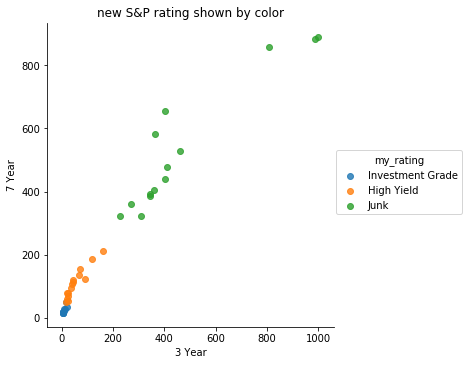

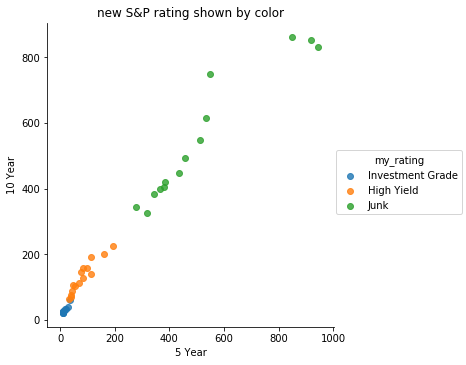

In [35]:
%matplotlib inline
def plot_cds(df_final, col1, col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.lmplot(x = col1, y = col2, 
               data = df_final, 
               hue = "my_rating", 
               fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('new S&P rating shown by color')
    plt.show()
plot_cds(df_final, '3 Year', '7 Year')
plot_cds(df_final, '5 Year', '10 Year')

<br>

**STEP 5** Scale / normalize the numeric values of the features
<br> A normalized dataset should ~ N (0,1); checked the mean & sd

In [36]:
from sklearn.preprocessing import scale

num_cols = ['3 Year', '5 Year', '7 Year', '10 Year']
df_scaled = scale(df_final[num_cols])
df_scaled = pd.DataFrame(df_scaled, columns = num_cols)
print(df_scaled.describe().round(3))

       3 Year  5 Year  7 Year  10 Year
count  42.000  42.000  42.000   42.000
mean    0.000  -0.000   0.000   -0.000
std     1.012   1.012   1.012    1.012
min    -0.692  -0.773  -0.829   -0.870
25%    -0.661  -0.727  -0.776   -0.813
50%    -0.542  -0.499  -0.452   -0.421
75%     0.607   0.602   0.611    0.624
max     3.204   2.876   2.628    2.488


In order to use sklearn pkg, the strings indicting S&P ratings must be re-coded as numbers.
 <br> Here we re-coded as {'Investment Grade':0, 'High Yield':1, 'Junk':2}

In [37]:
levels = {'Investment Grade':0, 'High Yield':1, 'Junk':2}
df_scaled['my_rating'] = [levels[x] for x in df_final['my_rating']]
df_scaled.head()

,3 Year,5 Year,7 Year,10 Year,my_rating
0,-0.670380,-0.750773,-0.800690,-0.845245,0
1,-0.453055,-0.422562,-0.354148,-0.325474,1
2,-0.253011,-0.187891,-0.145949,-0.146115,1
3,-0.687818,-0.771716,-0.828975,-0.870308,0
4,-0.631978,-0.706230,-0.758085,-0.800875,0


<br>

**STEP 6** Split the dataset
<br>Split the dataset **df_scaled** into randomly sampled training datasets **df_train_** and evaluation datasets **df_test_**. Checked the shape of splited datasets.

In [38]:
## Split the data into a training and test set
from sklearn.model_selection import train_test_split
#set seed
np.random.seed(129)
df_final_split = train_test_split(np.asmatrix(df_scaled), test_size = 21)
df_train_features = df_final_split[0][:, :4]
df_train_labels = np.ravel(df_final_split[0][:, 4])
df_test_features = df_final_split[1][:, :4]
df_test_labels = np.ravel(df_final_split[1][:, 4])
#print the shape to check the split
print(df_train_features.shape)
print(df_train_labels.shape)
print(df_test_features.shape)
print(df_test_labels.shape)

(21, 4)
(21,)
(21, 4)
(21,)


<br>

**STEP 7** Define and train the K-NN model. **K=3**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(df_train_features, df_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

<br>

**STEP 8** Evaluate this model

**1. using the accuracy statistic**

In [40]:
df_test = pd.DataFrame(df_test_features, columns = num_cols)
df_test['predicted'] = KNN_mod.predict(df_test_features)
df_test['correct'] = [1 if x == z else 0 for x, z in zip(df_test['predicted'], df_test_labels)]
accuracy = 100.0 * float(sum(df_test['correct'])) / float(df_test.shape[0])
print('Accuracy =' + str(accuracy))

Accuracy =95.23809523809524


**2. using 'true vs predicted' plot**

'How many S&P ratings are misclassified?'

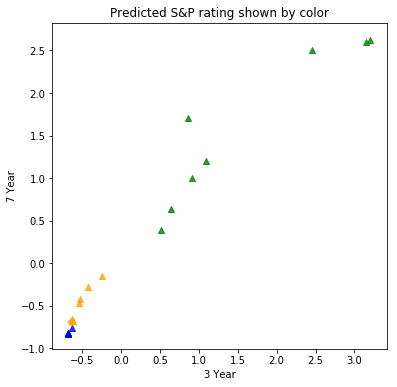

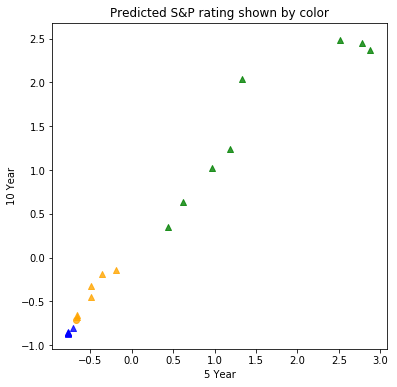

In [41]:
levels = {0:'Investment Grade', 1:'High Yield', 2:'Junk'}
df_test['my_rating'] = [levels[x] for x in df_test['predicted']]
markers = {1:'^', 0:'o'}
colors = {'Investment Grade':'blue', 'High Yield':'orange', 'Junk':'green'}
def plot_shapes(df, col1,col2,  markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers: # iterate over marker dictioary keys
        for c in colors: # iterate over color dictionary keys
            df_temp = df[(df['correct'] == m)  & (df['my_rating'] == c)]
            sns.regplot(x = col1, y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]},
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Predicted S&P rating shown by color')
    return 'How many S&P ratings are misclassified?'
plot_shapes(df_test, '3 Year', '7 Year', markers, colors)
plot_shapes(df_test, '5 Year', '10 Year', markers, colors)

## Summary

Based on Step 8, our machine learning model achieved an accuracy of 95.24%. 
<br> Based on Step 9's plots, correctly classified cases are shown by triangles and incorrectly classified cases are shown by circles. only one S&P rating is not classified correctly, which located in the 'overlapping' area between 'Investment Grade' and 'High Yield' types of CDS. I think it is forgivable: 1. limit of our sample size - sample size & Number of features; 2. inherent difficulty of clearly classification of S&P LT ratings.

<br>**Overall, I think K-NN machine learning model is a great tool to predict the S&P LT ratings. It can served as a reference in credit ratings. As more features and more data come in, the accuracy of the model will be improved.**